In [5]:
import json
import pandas as pd 
from prophet import Prophet
from prophet.serialize import model_to_json, model_from_json

In [3]:
data = pd.read_csv('../ts_data/example_wp_log_peyton_manning.csv', parse_dates=['ds'])
data

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [4]:
m = Prophet()
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7975.41    0.00109841       326.358      0.7019      0.7019      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7990.03    0.00870456       663.895      0.4236      0.4236      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        7994.7    0.00088867       189.435       2.393      0.2393      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7999.23   0.000490727       311.727       0.255           1      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     431       8000.37   3.72506e-05       109.303   1.977e-07       0.001      577  LS failed, Hessian reset 
     499       8001.34    0.00358046    

661   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     516       8001.75   8.59838e-05       172.808   8.777e-07       0.001      725  LS failed, Hessian reset 
     599       8002.95   0.000121156       94.0174       0.761       0.761      825   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       8004.19   0.000501805       173.003      0.8915      0.8915      948   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       8004.38   4.38799e-05       92.2042      0.4563      0.4563     1068   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     848       8004.41   8.52041e-07       60.2517           1           1     1134   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [6]:
# save model

with open('model.json', 'w') as f:
    json.dump(model_to_json(m), f)

In [7]:
# load model

with open('model.json', 'r') as f:
    loaded_m = model_from_json(json.load(f))

In [9]:
future = loaded_m.make_future_dataframe(periods=365)
forecast = loaded_m.predict(future)

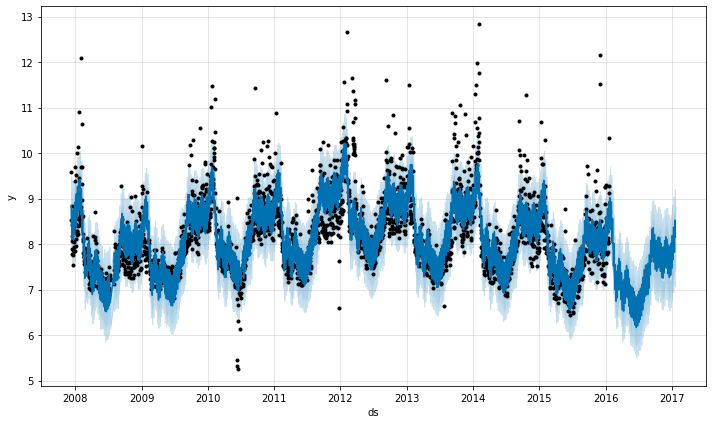

In [10]:
loaded_m.plot(forecast);